In [3]:
import numpy as np
import matplotlib.pyplot as plt

from fastprogress import progress_bar

In [22]:
def vget_rho(ks, reg_lambdas, m=50, n=100, n_samples=100):

    output_rhos = np.zeros_like(reg_lambdas)
    p, q = reg_lambdas.shape

    for i in progress_bar(range(p)):

        for j in range(q):

            rho_ests = []
            for l in range(n_samples):

                k = ks[i,j]
                reg_lambda = reg_lambdas[i,j]

                F = np.random.normal(size=(m,n))
                R = np.random.normal(size=(k,n))
                R = np.sqrt(reg_lambda)*R

                # Get spectrum of original problem
                Q1 = (F.T @ F) + (R.T @ R)
                #Q1_eigvals = np.real(np.flip(np.sort(np.linalg.eigvals(Q1))))
                Q1_cond = np.linalg.cond(Q1)

                # Get spectrum for transformed problem
                Rpinv = np.linalg.pinv(R)
                Q2 = np.eye(R.shape[0]) + (Rpinv.T @ F.T @ F @ Rpinv)
                #Q2_eigvals = np.real(np.flip(np.sort(np.linalg.eigvals(Q2))))
                Q2_cond = np.linalg.cond(Q2)

                # Improvement factor
                rho = Q1_cond/Q2_cond
                rho_ests.append(rho)

            rho_est = np.mean(rho_ests)
            output_rhos[i,j] = rho_est

            # print("finished one")
            

    return output_rhos

In [23]:
# Define the range and grid density for the parameters
x =  np.asarray([i for i in range(100, 210, 10)]) # ks
y =  np.logspace(-1, 3, num=20) # regularization parameter

# Create a meshgrid for the parameters
X, Y = np.meshgrid(x, y)

In [24]:
# Compute the function values
Z = vget_rho(X, Y)

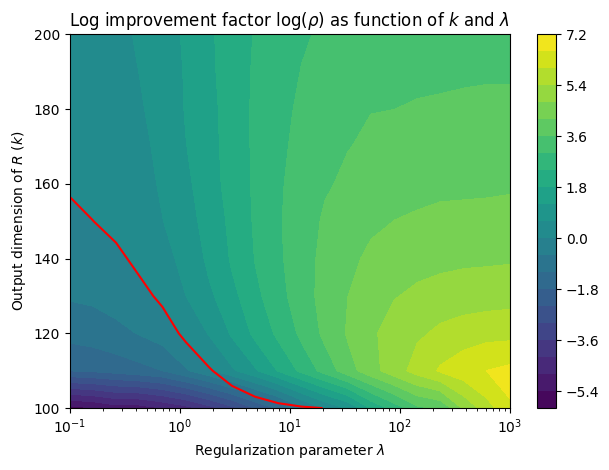

In [26]:
# Create the heatmap
plt.contourf(Y, X, np.log(Z), 20, cmap='viridis')
# Add a color bar to show the scale
plt.colorbar()

plt.contour(Y, X, Z, levels=[1.0], colors='red')



# Add labels and title if desired
plt.xlabel('Regularization parameter $\lambda$')
plt.ylabel('Output dimension of $R$ ($k$)')
plt.title('Log improvement factor $\log(\\rho)$ as function of $k$ and $\lambda$')
plt.xscale("log")
plt.tight_layout()
plt.savefig("random_conditioning.png", dpi=250, bbox_inches="tight")
plt.savefig("random_conditioning.eps", bbox_inches="tight")
# Show the plot
plt.show()